In [ ]:
import imaplib
from email.header import decode_header

In [ ]:
imap_host = 'imap.gmail.com'
imap_user = 'chocolate57star@gmail.com'
imap_pass = 'eleuqmnzjzsyeuxl'

In [ ]:
imap = imaplib.IMAP4_SSL(imap_host)
imap

In [ ]:
imap.login(imap_user,imap_pass)

('OK', [b'chocolate57star@gmail.com authenticated (Success)'])

In [ ]:
imap.select('[Gmail]/Spam')

('OK', [b'24'])

In [ ]:
a,b = imap.search(None,'To','chocolate57star@gmail.com')

In [ ]:
list_of_mail = b[0].split()

In [ ]:
msgs = []
for num in list_of_mail:
  typ,data = imap.fetch(num,'(RFC822)')
  #print(data)
  msgs.append(data)


In [ ]:
import email

subj = []
From = []
To = []
Date = []

for i in msgs:
  for j in i:
    if type(j) == tuple:
       my_msg=email.message_from_bytes((j[1]))
       From.append(my_msg['From'])
       To.append(my_msg['To'])
       Date.append(my_msg['Date'])

       sub,en = decode_header(my_msg["Subject"])[0]
       if isinstance(sub, str):
          subj.append(sub)
       else:
        subject = sub.decode(en)
        subj.append(subject)
     


In [ ]:
From1 = []
for i in From:
  j = i.split("<")[0]
  if "Q?" in j and "?=" in j:
    k = j.split("Q?")[1]
    From1.append(k.split('?')[0])
  else:
    From1.append(j)

In [ ]:
Email_id = []
for i in From:
  j = i.split('<')[1].strip(">")
  Email_id.append(j)

In [ ]:
import pandas as pd
spam_dat = pd.DataFrame({'To' : To,'From' : From1, "Email_id" : Email_id, 'Date' : Date,'Subject' : subj})
spam_dat['Label'] = 'spam'

In [ ]:
spam_dat

,To,From,Email_id,Date,Subject,Label
0,chocolate57star@gmail.com,"""ICICI Bank""",info@amyq.formirror.com,"Sun, 21 Aug 2022 05:42:25 +0000",No Joining Fee. No Annual Fee. Lifetime free P...,spam
1,chocolate57star@gmail.com,"""Marks and Spencer India""",info@amyq.formirror.com,"Thu, 25 Aug 2022 08:20:18 +0000",Last Chance - Upto 60% off. Hurry!,spam
2,chocolate57star@gmail.com,"""Amazon""",info@amyq.formirror.com,"Wed, 31 Aug 2022 08:12:07 +0000",60 - 80 % off: Special deals for you,spam
3,<chocolate57star@gmail.com>,Zivame,help@zivmailer.com,"Fri, 2 Sep 2022 07:49:00 +0000",Are you READY ᕦ(ò_óˇ)ᕤ,spam
4,chocolate57star@gmail.com,nurserylive,info@update.nurserylive.com,"Fri, 02 Sep 2022 15:45:42 +0530",🌼🌸❀✿🌷 This Flower Plants Pack will make you Sm...,spam
5,<chocolate57star@gmail.com>,Zivame,help@zivmailer.com,"Sat, 3 Sep 2022 04:51:21 +0000",Ready for the GLF Quest? (っ.❛ ᴗ ❛.)っ,spam
6,chocolate57star@gmail.com,"""Big Sale""",info@pike.courierbasket.com,"Sat, 03 Sep 2022 05:38:26 +0000",Reebok Sale – Flat 50% OFF,spam
7,chocolate57star@gmail.com,"""Life Time Free Card""",info@amyq.formirror.com,"Sat, 03 Sep 2022 07:42:19 +0000","Congrats, You are Qualified for ICICI Bank Lif...",spam
8,chocolate57star@gmail.com,nurserylive,info@update.nurserylive.com,"Sat, 03 Sep 2022 21:13:52 +0530",Re: 🌻 Collect Your 6 NASA Plants under Urban P...,spam
9,<chocolate57star@gmail.com>,Zivame,help@zivmailer.com,"Sun, 4 Sep 2022 05:02:28 +0000",Guess who else is here! 👀🥳 at GLF,spam


In [ ]:
imap.select('Inbox')

('OK', [b'15198'])

In [ ]:
a,b = imap.search(None,'To','chocolate57star@gmail.com')
mail_list = b[0].split()
mail_list

[b'1',
 b'2',
 b'3',
 b'4',
 b'11',
 b'25',
 b'31',
 b'38',
 b'39',
 b'40',
 b'41',
 b'42',
 b'43',
 b'44',
 b'45',
 b'46',
 b'47',
 b'48',
 b'49',
 b'50',
 b'51',
 b'52',
 b'53',
 b'54',
 b'55',
 b'56',
 b'57',
 b'58',
 b'59',
 b'60',
 b'61',
 b'62',
 b'63',
 b'64',
 b'65',
 b'66',
 b'67',
 b'68',
 b'69',
 b'70',
 b'71',
 b'72',
 b'73',
 b'74',
 b'75',
 b'76',
 b'77',
 b'78',
 b'79',
 b'80',
 b'81',
 b'82',
 b'83',
 b'84',
 b'85',
 b'86',
 b'87',
 b'88',
 b'89',
 b'90',
 b'91',
 b'92',
 b'93',
 b'94',
 b'95',
 b'96',
 b'97',
 b'98',
 b'99',
 b'100',
 b'101',
 b'102',
 b'103',
 b'104',
 b'105',
 b'106',
 b'107',
 b'108',
 b'109',
 b'110',
 b'111',
 b'112',
 b'113',
 b'114',
 b'115',
 b'116',
 b'117',
 b'118',
 b'119',
 b'120',
 b'121',
 b'122',
 b'123',
 b'124',
 b'125',
 b'126',
 b'127',
 b'128',
 b'129',
 b'130',
 b'131',
 b'132',
 b'133',
 b'134',
 b'135',
 b'136',
 b'137',
 b'138',
 b'139',
 b'140',
 b'141',
 b'142',
 b'143',
 b'144',
 b'145',
 b'146',
 b'147',
 b'148',
 b'149',
 b

In [ ]:
msgs = []
for i in mail_list[15112:15048:-1]:
  typ,data = imap.fetch(i,'(RFC822)')
  msgs.append(data)

In [ ]:
subj = []
From = []
To = []
Date = []

for i in msgs:
  for j in i:
    if type(j) == tuple:
       my_msg=email.message_from_bytes((j[1]))
       From.append(my_msg['From'])
       To.append(my_msg['To'])
       Date.append(my_msg['Date'])

       sub,en = decode_header(my_msg["Subject"])[0]
       if sub == None:
         subj.append('Nan')
       else:
          subj.append(sub)

In [ ]:
From1 = []

for i in From:
    From1.append(i.split("<")[0])

In [ ]:
Email_id = []

for i in From:
    j = i.split("<")
    if len(j) >= 2:
      Email_id.append(j[1])
    else:
      Email_id.append(j)

In [ ]:
ham_dat = pd.DataFrame({'To' : To,'From' : From1, "Email_id": Email_id, 'Date' : Date,'Subject' : subj})
ham_dat['Label'] = 'ham'

In [ ]:
data1 = pd.concat((spam_dat,ham_dat),axis=0)
data1

,To,From,Email_id,Date,Subject,Label
0,chocolate57star@gmail.com,"""ICICI Bank""",info@amyq.formirror.com,"Sun, 21 Aug 2022 05:42:25 +0000",No Joining Fee. No Annual Fee. Lifetime free P...,spam
1,chocolate57star@gmail.com,"""Marks and Spencer India""",info@amyq.formirror.com,"Thu, 25 Aug 2022 08:20:18 +0000",Last Chance - Upto 60% off. Hurry!,spam
2,chocolate57star@gmail.com,"""Amazon""",info@amyq.formirror.com,"Wed, 31 Aug 2022 08:12:07 +0000",60 - 80 % off: Special deals for you,spam
3,<chocolate57star@gmail.com>,Zivame,help@zivmailer.com,"Fri, 2 Sep 2022 07:49:00 +0000",Are you READY ᕦ(ò_óˇ)ᕤ,spam
4,chocolate57star@gmail.com,nurserylive,info@update.nurserylive.com,"Fri, 02 Sep 2022 15:45:42 +0530",🌼🌸❀✿🌷 This Flower Plants Pack will make you Sm...,spam
...,...,...,...,...,...,...
59,Kalpataru Dhakate <chocolate57star@gmail.com>,LinkedIn Job Alerts,jobalerts-noreply@linkedin.com>,"Thu, 8 Sep 2022 09:56:36 +0000 (UTC)",1 new job for 'slp specialist amazon',ham
60,chocolate57star@gmail.com,"""Health & Glow""",info@webmail.healthandglow.com>,"Thu, 08 Sep 2022 09:03:01 +0000",b'Bath & Body Fest \xf0\x9f\x9a\xa8 Live Now',ham
61,<chocolate57star@gmail.com>,"""Indeed""",alert@indeed.com>,"Thu, 08 Sep 2022 06:21:47 +0000","Apply to jobs at Stefanini, Inc, ADCI HYD 13 S...",ham
62,chocolate57star@gmail.com,Job alerts from Google,notify-noreply@google.com>,"Wed, 07 Sep 2022 19:25:21 -0700",b'6 new jobs for \xe2\x80\x98forensic expert r...,ham


In [ ]:
imap_host = 'imap.gmail.com'
imap_user = 'kalpatarudhakate57@gmail.com'
imap_pass = 'mpmfbphnhyjxvdug'

In [ ]:
imap = imaplib.IMAP4_SSL(imap_host)
imap

In [ ]:
imap.login(imap_user,imap_pass)

('OK', [b'kalpatarudhakate57@gmail.com authenticated (Success)'])

In [ ]:
imap.select('[Gmail]/Spam')

('OK', [b'13'])

In [ ]:
a,b = imap.search(None,'To','kalpatarudhakate57@gmail.com')

In [ ]:
list_of_mail = b[0].split()

In [ ]:
msgs = []
for num in list_of_mail:
  typ,data = imap.fetch(num,'(RFC822)')
  print(data)
  msgs.append(data)
msgs

[(b'1 (RFC822 {64762}', b'Delivered-To: kalpatarudhakate57@gmail.com\r\nReceived: by 2002:a17:906:b2c4:b0:739:bc5f:72bd with SMTP id cf4csp297996ejb;\r\n        Wed, 31 Aug 2022 06:04:03 -0700 (PDT)\r\nX-Google-Smtp-Source: AA6agR4r8dHOInvvwdx0B5SjYesfSf2atF5t9bnqYBQEBkH9TJbEcf0qWC561VHwp44Cbl1qDlyE\r\nX-Received: by 2002:ab0:6618:0:b0:39f:88a9:db69 with SMTP id r24-20020ab06618000000b0039f88a9db69mr5198327uam.115.1661951042460;\r\n        Wed, 31 Aug 2022 06:04:02 -0700 (PDT)\r\nARC-Seal: i=1; a=rsa-sha256; t=1661951042; cv=none;\r\n        d=google.com; s=arc-20160816;\r\n        b=wASTZNtJtPvR+nU/eSx8pPbOIjrybsU1kRexEil372emoraj483lUKvvIzYDE9/S+C\r\n         dFimijdA2HVrb73wOq2/W1oxYZ9veblu7DVeovLL5nJVhfM+/RXXZZH7pGu7in57ySz1\r\n         PYcHZLWEOuLMHiqNDAj2xECx/N8WWyf/ibqqGItjzBNVGsq/R3I5N8hZynJLlPz8EYQI\r\n         PYUPqyulfysP3qREp50GMSYkarWIL9iOJ28ci6yk4erYx7pqbdEmT2JMTNmPw69gIyQP\r\n         PN8p4bbuIacEXb7zHIqks/9yzVkCVkNstQV36EU46XifTbgaoks+ecUlG+6WsLWxg5cB\r\n         1bFg==

[[(b'1 (RFC822 {64762}',
   b'Delivered-To: kalpatarudhakate57@gmail.com\r\nReceived: by 2002:a17:906:b2c4:b0:739:bc5f:72bd with SMTP id cf4csp297996ejb;\r\n        Wed, 31 Aug 2022 06:04:03 -0700 (PDT)\r\nX-Google-Smtp-Source: AA6agR4r8dHOInvvwdx0B5SjYesfSf2atF5t9bnqYBQEBkH9TJbEcf0qWC561VHwp44Cbl1qDlyE\r\nX-Received: by 2002:ab0:6618:0:b0:39f:88a9:db69 with SMTP id r24-20020ab06618000000b0039f88a9db69mr5198327uam.115.1661951042460;\r\n        Wed, 31 Aug 2022 06:04:02 -0700 (PDT)\r\nARC-Seal: i=1; a=rsa-sha256; t=1661951042; cv=none;\r\n        d=google.com; s=arc-20160816;\r\n        b=wASTZNtJtPvR+nU/eSx8pPbOIjrybsU1kRexEil372emoraj483lUKvvIzYDE9/S+C\r\n         dFimijdA2HVrb73wOq2/W1oxYZ9veblu7DVeovLL5nJVhfM+/RXXZZH7pGu7in57ySz1\r\n         PYcHZLWEOuLMHiqNDAj2xECx/N8WWyf/ibqqGItjzBNVGsq/R3I5N8hZynJLlPz8EYQI\r\n         PYUPqyulfysP3qREp50GMSYkarWIL9iOJ28ci6yk4erYx7pqbdEmT2JMTNmPw69gIyQP\r\n         PN8p4bbuIacEXb7zHIqks/9yzVkCVkNstQV36EU46XifTbgaoks+ecUlG+6WsLWxg5cB\r\n         1b

In [ ]:
subj = []
From = []
To = []
Date = []

for i in msgs:
  for j in i:
    if type(j) == tuple:
       my_msg=email.message_from_bytes((j[1]))
       From.append(my_msg['From'])
       To.append(my_msg['To'])
       Date.append(my_msg['Date'])

       sub,en = decode_header(my_msg["Subject"])[0]
       if isinstance(sub, str):
          subj.append(sub)
       else:
        subject = sub.decode(en)
        subj.append(subject)
     

In [ ]:
From1 = []

for i in From:
    From1.append(i.split("<")[0])

In [ ]:
Email_id = []
for i in From:
  j = i.split('<')[1].strip(">")
  Email_id.append(j)

In [ ]:
spam_dat = pd.DataFrame({'To' : To,'From' : From1, "Email_id" : Email_id, 'Date' : Date,'Subject' : subj})
spam_dat['Label'] = 'spam'

In [ ]:
imap.select('Inbox')

('OK', [b'4617'])

In [ ]:
a,b = imap.search(None,'To','kalpatarudhakate57@gmail.com')
mail_list = b[0].split()
mail_list

[b'1',
 b'2',
 b'3',
 b'4',
 b'5',
 b'6',
 b'7',
 b'8',
 b'9',
 b'10',
 b'11',
 b'12',
 b'13',
 b'14',
 b'15',
 b'16',
 b'17',
 b'18',
 b'19',
 b'20',
 b'21',
 b'22',
 b'23',
 b'24',
 b'25',
 b'26',
 b'27',
 b'28',
 b'29',
 b'30',
 b'31',
 b'32',
 b'33',
 b'34',
 b'35',
 b'36',
 b'37',
 b'38',
 b'39',
 b'40',
 b'41',
 b'42',
 b'43',
 b'44',
 b'45',
 b'46',
 b'47',
 b'48',
 b'49',
 b'50',
 b'51',
 b'52',
 b'53',
 b'54',
 b'55',
 b'56',
 b'57',
 b'58',
 b'59',
 b'60',
 b'61',
 b'62',
 b'63',
 b'64',
 b'65',
 b'66',
 b'67',
 b'68',
 b'69',
 b'70',
 b'71',
 b'72',
 b'73',
 b'74',
 b'75',
 b'76',
 b'77',
 b'78',
 b'79',
 b'80',
 b'81',
 b'82',
 b'83',
 b'84',
 b'85',
 b'86',
 b'87',
 b'88',
 b'89',
 b'90',
 b'91',
 b'92',
 b'93',
 b'94',
 b'95',
 b'96',
 b'97',
 b'98',
 b'99',
 b'100',
 b'101',
 b'102',
 b'103',
 b'104',
 b'105',
 b'106',
 b'107',
 b'108',
 b'109',
 b'110',
 b'111',
 b'112',
 b'113',
 b'114',
 b'115',
 b'116',
 b'117',
 b'118',
 b'119',
 b'120',
 b'121',
 b'122',
 b'123',
 

In [ ]:
len(mail_list)

4470

In [ ]:
msgs = []
for i in mail_list[4468:4408:-1]:
  typ,data = imap.fetch(i,'(RFC822)')
  msgs.append(data)

In [ ]:
subj = []
From = []
To = []
Date = []

for i in msgs:
  for j in i:
    if type(j) == tuple:
       my_msg=email.message_from_bytes((j[1]))
       From.append(my_msg['From'])
       To.append(my_msg['To'])
       Date.append(my_msg['Date'])

       sub,en = decode_header(my_msg["Subject"])[0]
       if sub == None:
         subj.append('Nan')
       else:
          subj.append(sub)

In [ ]:
From1 = []

for i in From:
    From1.append(i.split("<")[0])

In [ ]:
Email_id = []
for i in From:
  j = i.split('<')[1].strip(">")
  Email_id.append(j)

In [ ]:
ham_dat = pd.DataFrame({'To' : To,'From' : From1, "Email_id" : Email_id, 'Date' : Date,'Subject' : subj})
ham_dat['Label'] = 'ham'
ham_dat

,To,From,Email_id,Date,Subject,Label
0,kalpatarudhakate57@gmail.com,Amazon Web Services,aws-apj-marketing@amazon.com,"Tue, 20 Sep 2022 03:12:49 +0000",b'You\xe2\x80\x99re invited: AWS Innovate - Mo...,ham
1,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>",LinkedIn,invitations@linkedin.com,"Tue, 20 Sep 2022 02:36:35 +0000 (UTC)","See Sahith's and other people's connections, e...",ham
2,kalpatarudhakate57@gmail.com,Medium Daily Digest,noreply@medium.com,"Tue, 20 Sep 2022 02:10:00 +0000 (UTC)",b'How to prepare for top technology companies ...,ham
3,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>","""Nileshkumar (via LinkedIn)""",messages-noreply@linkedin.com,"Tue, 20 Sep 2022 01:36:38 +0000 (UTC)",b'Nileshkumar\xe2\x80\x99s invitation is waiti...,ham
4,kalpatarudhakate57@gmail.com,Kaggle,noreply@kaggle.com,"Mon, 19 Sep 2022 16:09:53 -0700",Announcing Kaggle Learn Guides,ham
5,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>",LinkedIn Job Alerts,jobalerts-noreply@linkedin.com,"Mon, 19 Sep 2022 22:38:46 +0000 (UTC)",b'30+ new jobs for \xe2\x80\x9cData Analyst\xe...,ham
6,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>",LinkedIn,jobs-noreply@linkedin.com,"Mon, 19 Sep 2022 21:24:19 +0000 (UTC)","Kalpataru, apply to Analytics and Insights Sen...",ham
7,kalpatarudhakate57@gmail.com,Nykaa,noreply@nykaa.com,"Tue, 20 Sep 2022 01:51:35 +0530",b'The Grand Festive Sale\xe2\x80\x99s got you ...,ham
8,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>",LinkedIn,messages-noreply@linkedin.com,"Mon, 19 Sep 2022 19:49:15 +0000 (UTC)","Kalpataru, explore free courses to prepare for...",ham
9,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>",LinkedIn,jobs-noreply@linkedin.com,"Mon, 19 Sep 2022 19:10:13 +0000 (UTC)",New jobs similar to Data Analyst at Chicnutrix,ham


In [ ]:
data2 = pd.concat((spam_dat,ham_dat),axis=0)
data2

,To,From,Email_id,Date,Subject,Label
0,kalpatarudhakate57@gmail.com,Freelancer.com,noreply@updates.freelancer.com,"Wed, 31 Aug 2022 09:04:02 -0400",Grow your business with a digital workplace (1...,spam
1,kalpatarudhakate57@gmail.com,Freelancer.com,noreply@updates.freelancer.com,"Thu, 01 Sep 2022 09:15:34 -0400",Grow your business with a digital workplace (2...,spam
2,kalpatarudhakate57@gmail.com,"""Wharton Online""",updates@simplilearnmailer.com,"Sat, 03 Sep 2022 12:16:40 +0000",📣 Register Now || Live Preview Of Wharton Onli...,spam
3,kalpatarudhakate57@gmail.com,Freelancer.com,noreply@updates.freelancer.com,"Tue, 06 Sep 2022 06:49:33 -0400",The secrets of freelancing success. Unlocked.,spam
4,kalpatarudhakate57@gmail.com,contact ineuron,contact@ineuron.ai,"Mon, 05 Sep 2022 13:21:29 +0000 (UTC)",Happy Teacher's Day | Access Neuro-Lab for FRE...,spam
...,...,...,...,...,...,...
55,kalpatarudhakate57@gmail.com,Quora Suggested Spaces,bunkmasters-space@quora.com,"Wed, 14 Sep 2022 10:36:20 +0000",b'What are some of your funniest moments in cl...,ham
56,kalpatarudhakate57@gmail.com,Kalpataru Dhakate,kalpatarudhakate57@gmail.com,"Wed, 14 Sep 2022 14:49:53 +0530",Document from Kd,ham
57,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>",LinkedIn,jobs-listings@linkedin.com,"Wed, 14 Sep 2022 07:12:59 +0000 (UTC)",Tata nexarc is hiring: Data Scientist.,ham
58,kalpatarudhakate57@gmail.com,Medium Daily Digest,noreply@medium.com,"Wed, 14 Sep 2022 02:10:00 +0000 (UTC)",ANALYZING AND PREDICTING DEPRESSION AMONG COLL...,ham


In [ ]:
data1

,To,From,Email_id,Date,Subject,Label
0,chocolate57star@gmail.com,"""ICICI Bank""",info@amyq.formirror.com,"Sun, 21 Aug 2022 05:42:25 +0000",No Joining Fee. No Annual Fee. Lifetime free P...,spam
1,chocolate57star@gmail.com,"""Marks and Spencer India""",info@amyq.formirror.com,"Thu, 25 Aug 2022 08:20:18 +0000",Last Chance - Upto 60% off. Hurry!,spam
2,chocolate57star@gmail.com,"""Amazon""",info@amyq.formirror.com,"Wed, 31 Aug 2022 08:12:07 +0000",60 - 80 % off: Special deals for you,spam
3,<chocolate57star@gmail.com>,Zivame,help@zivmailer.com,"Fri, 2 Sep 2022 07:49:00 +0000",Are you READY ᕦ(ò_óˇ)ᕤ,spam
4,chocolate57star@gmail.com,nurserylive,info@update.nurserylive.com,"Fri, 02 Sep 2022 15:45:42 +0530",🌼🌸❀✿🌷 This Flower Plants Pack will make you Sm...,spam
...,...,...,...,...,...,...
59,Kalpataru Dhakate <chocolate57star@gmail.com>,LinkedIn Job Alerts,jobalerts-noreply@linkedin.com>,"Thu, 8 Sep 2022 09:56:36 +0000 (UTC)",1 new job for 'slp specialist amazon',ham
60,chocolate57star@gmail.com,"""Health & Glow""",info@webmail.healthandglow.com>,"Thu, 08 Sep 2022 09:03:01 +0000",b'Bath & Body Fest \xf0\x9f\x9a\xa8 Live Now',ham
61,<chocolate57star@gmail.com>,"""Indeed""",alert@indeed.com>,"Thu, 08 Sep 2022 06:21:47 +0000","Apply to jobs at Stefanini, Inc, ADCI HYD 13 S...",ham
62,chocolate57star@gmail.com,Job alerts from Google,notify-noreply@google.com>,"Wed, 07 Sep 2022 19:25:21 -0700",b'6 new jobs for \xe2\x80\x98forensic expert r...,ham


In [ ]:
data = pd.concat((data1,data2),axis=0)
data

,To,From,Email_id,Date,Subject,Label
0,chocolate57star@gmail.com,"""ICICI Bank""",info@amyq.formirror.com,"Sun, 21 Aug 2022 05:42:25 +0000",No Joining Fee. No Annual Fee. Lifetime free P...,spam
1,chocolate57star@gmail.com,"""Marks and Spencer India""",info@amyq.formirror.com,"Thu, 25 Aug 2022 08:20:18 +0000",Last Chance - Upto 60% off. Hurry!,spam
2,chocolate57star@gmail.com,"""Amazon""",info@amyq.formirror.com,"Wed, 31 Aug 2022 08:12:07 +0000",60 - 80 % off: Special deals for you,spam
3,<chocolate57star@gmail.com>,Zivame,help@zivmailer.com,"Fri, 2 Sep 2022 07:49:00 +0000",Are you READY ᕦ(ò_óˇ)ᕤ,spam
4,chocolate57star@gmail.com,nurserylive,info@update.nurserylive.com,"Fri, 02 Sep 2022 15:45:42 +0530",🌼🌸❀✿🌷 This Flower Plants Pack will make you Sm...,spam
...,...,...,...,...,...,...
55,kalpatarudhakate57@gmail.com,Quora Suggested Spaces,bunkmasters-space@quora.com,"Wed, 14 Sep 2022 10:36:20 +0000",b'What are some of your funniest moments in cl...,ham
56,kalpatarudhakate57@gmail.com,Kalpataru Dhakate,kalpatarudhakate57@gmail.com,"Wed, 14 Sep 2022 14:49:53 +0530",Document from Kd,ham
57,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>",LinkedIn,jobs-listings@linkedin.com,"Wed, 14 Sep 2022 07:12:59 +0000 (UTC)",Tata nexarc is hiring: Data Scientist.,ham
58,kalpatarudhakate57@gmail.com,Medium Daily Digest,noreply@medium.com,"Wed, 14 Sep 2022 02:10:00 +0000 (UTC)",ANALYZING AND PREDICTING DEPRESSION AMONG COLL...,ham


In [ ]:
#data.to_csv(r'/content/drive/MyDrive/dataset/SpamHam.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/SpamHam.csv')
df

,To,From,Email_id,Date,Subject,Label
0,chocolate57star@gmail.com,"""ICICI Bank""",info@amyq.formirror.com,"Sun, 21 Aug 2022 05:42:25 +0000",No Joining Fee. No Annual Fee. Lifetime free P...,spam
1,chocolate57star@gmail.com,"""Marks and Spencer India""",info@amyq.formirror.com,"Thu, 25 Aug 2022 08:20:18 +0000",Last Chance - Upto 60% off. Hurry!,spam
2,chocolate57star@gmail.com,"""Amazon""",info@amyq.formirror.com,"Wed, 31 Aug 2022 08:12:07 +0000",60 - 80 % off: Special deals for you,spam
3,<chocolate57star@gmail.com>,Zivame,help@zivmailer.com,"Fri, 2 Sep 2022 07:49:00 +0000",Are you READY ᕦ(ò_óˇ)ᕤ,spam
4,chocolate57star@gmail.com,nurserylive,info@update.nurserylive.com,"Fri, 02 Sep 2022 15:45:42 +0530",🌼🌸❀✿🌷 This Flower Plants Pack will make you Sm...,spam
...,...,...,...,...,...,...
156,kalpatarudhakate57@gmail.com,Quora Suggested Spaces,bunkmasters-space@quora.com,"Wed, 14 Sep 2022 10:36:20 +0000",b'What are some of your funniest moments in cl...,ham
157,kalpatarudhakate57@gmail.com,Kalpataru Dhakate,kalpatarudhakate57@gmail.com,"Wed, 14 Sep 2022 14:49:53 +0530",Document from Kd,ham
158,"""Kalpataru D."" <kalpatarudhakate57@gmail.com>",LinkedIn,jobs-listings@linkedin.com,"Wed, 14 Sep 2022 07:12:59 +0000 (UTC)",Tata nexarc is hiring: Data Scientist.,ham
159,kalpatarudhakate57@gmail.com,Medium Daily Digest,noreply@medium.com,"Wed, 14 Sep 2022 02:10:00 +0000 (UTC)",ANALYZING AND PREDICTING DEPRESSION AMONG COLL...,ham


In [ ]:
df['From'].value_counts()

LinkedIn                      16
LinkedIn Job Alerts           11
Zivame                        11
"Health & Glow"                8
"Coursera"                     8
                              ..
Internshala                    1
"Marks and Spencer India"      1
NCERT                          1
CBC-MIB                        1
DataCamp Insights              1
Name: From, Length: 62, dtype: int64

In [ ]:
df.rename(columns={'Subject':'message'},inplace=True)

In [ ]:
df.rename(columns={'Label':'label'},inplace=True)

In [ ]:
x = df[['label','message']]
x

,label,message
0,spam,No Joining Fee. No Annual Fee. Lifetime free P...
1,spam,Last Chance - Upto 60% off. Hurry!
2,spam,60 - 80 % off: Special deals for you
3,spam,Are you READY ᕦ(ò_óˇ)ᕤ
4,spam,🌼🌸❀✿🌷 This Flower Plants Pack will make you Sm...
...,...,...
156,ham,b'What are some of your funniest moments in cl...
157,ham,Document from Kd
158,ham,Tata nexarc is hiring: Data Scientist.
159,ham,ANALYZING AND PREDICTING DEPRESSION AMONG COLL...


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/dataset/Copy of spam.tsv',sep='\t')
df1

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df1.drop(['length','punct'],axis=1,inplace=True)
df1

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
dataframe = pd.concat((x,df1),axis=0)
dataframe

,label,message
0,spam,No Joining Fee. No Annual Fee. Lifetime free P...
1,spam,Last Chance - Upto 60% off. Hurry!
2,spam,60 - 80 % off: Special deals for you
3,spam,Are you READY ᕦ(ò_óˇ)ᕤ
4,spam,🌼🌸❀✿🌷 This Flower Plants Pack will make you Sm...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
dataframe.reset_index(drop=True,inplace=True)
dataframe

,label,message
0,spam,No Joining Fee. No Annual Fee. Lifetime free P...
1,spam,Last Chance - Upto 60% off. Hurry!
2,spam,60 - 80 % off: Special deals for you
3,spam,Are you READY ᕦ(ò_óˇ)ᕤ
4,spam,🌼🌸❀✿🌷 This Flower Plants Pack will make you Sm...
...,...,...
5728,spam,This is the 2nd time we have tried 2 contact u...
5729,ham,Will ü b going to esplanade fr home?
5730,ham,"Pity, * was in mood for that. So...any other s..."
5731,ham,The guy did some bitching but I acted like i'd...


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733 entries, 0 to 5732
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5733 non-null   object
 1   message  5732 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB


In [ ]:
dataframe[dataframe['message'].isna()]

,label,message
139,ham,NaN


In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
dataframe.shape

(5732, 2)

In [ ]:
dataframe.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
# check imbalance dataset

dataframe['label'].value_counts() / (len(dataframe))

ham     0.863224
spam    0.136776
Name: label, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


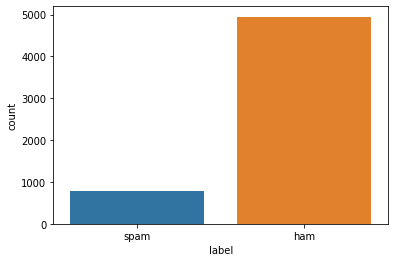

In [ ]:
sns.countplot(dataframe['label'])

In [ ]:
def text_preprocess(message):
    # Remove punctuations
    nopunc = [char for char in message if char not in string.punctuation]

    # Join the characters again
    nopunc = "".join(nopunc)
    nopunc = nopunc.lower()

    # Remove any stopwords and non-alphabetic characters
    nostop = [
        word
        for word in nopunc.split()
        if word.lower() not in stopwords.words("english") and word.isalpha()
    ]

    return nostop

In [ ]:
a = 'hey kalp here'
b = " ".join(text_preprocess(a))
b

'hey kalp'

In [ ]:
ham = dataframe[dataframe['label']=='ham']
spam = dataframe[dataframe['label']=='spam']

In [ ]:
spam_messages = dataframe[dataframe["label"] == "spam"]["message"]
ham_messages = dataframe[dataframe["label"] == "ham"]["message"]

In [ ]:
spam_words = []
for each_message in spam_messages:
    spam_words += text_preprocess(each_message)
spam_words

['joining',
 'fee',
 'annual',
 'fee',
 'lifetime',
 'free',
 'platinum',
 'chip',
 'card',
 'last',
 'chance',
 'upto',
 'hurry',
 'special',
 'deals',
 'ready',
 'ᕦòóˇᕤ',
 'flower',
 'plants',
 'pack',
 'make',
 'smile',
 'year',
 'kalpataru',
 'ready',
 'glf',
 'quest',
 'ᴗ',
 'reebok',
 'sale',
 'flat',
 'congrats',
 'qualified',
 'icici',
 'bank',
 'lifetime',
 'free',
 'credit',
 'card',
 'collect',
 'nasa',
 'plants',
 'urban',
 'plantation',
 'drive',
 'kalpataru',
 'guess',
 'else',
 'glf',
 'benefits',
 'including',
 'flipkart',
 'voucher',
 'worth',
 'flipkart',
 'axis',
 'bank',
 'credit',
 'card',
 'cant',
 'decide',
 'styles',
 'get',
 'glf',
 'youve',
 'waiting',
 'finally',
 'sale',
 'remember',
 'collect',
 'nasa',
 'air',
 'purifying',
 'plants',
 'asap',
 'kalpataru',
 'youve',
 'struck',
 'burning',
 'question',
 'lakh',
 'women',
 'shopped',
 'grand',
 'lingerie',
 'latest',
 'deals',
 'upto',
 'shop',
 'come',
 'back',
 'miss',
 'sell',
 'car',
 'week',
 'within',

In [ ]:
print('Top 10 Spam word \n')

pd.Series(spam_words).value_counts().head(10)


Top 10 Spam word 



call      347
free      222
txt       150
u         147
ur        144
mobile    123
text      120
stop      115
claim     113
reply     101
dtype: int64

In [ ]:
ham_words = []
for each_message in ham_messages:
    ham_words += text_preprocess(each_message)
ham_words

['security',
 'alert',
 'new',
 'job',
 'slp',
 'specialist',
 'amazon',
 'kalpataru',
 'add',
 'kalpojyoti',
 'saikia',
 'network',
 'new',
 'jobs',
 'slp',
 'amazon',
 'job',
 'byour',
 'threat',
 'intel',
 'september',
 'glam',
 'sale',
 'kalpataru',
 'please',
 'add',
 'linkedin',
 'network',
 'new',
 'jobs',
 'expert',
 'recruitment',
 'india',
 'forensic',
 'expert',
 'recruitment',
 'sept',
 'new',
 'forensic',
 'vacancy',
 'hyderabad',
 'telangana',
 'security',
 'alert',
 'brian',
 'l',
 'patterson',
 'shared',
 'post',
 'youre',
 'invited',
 'master',
 'computer',
 'science',
 'data',
 'sciences',
 'upcoming',
 'webinar',
 'bkalpataru',
 'career',
 'takes',
 'success',
 'new',
 'job',
 'slp',
 'amazon',
 'job',
 'bblockbusters',
 'ki',
 'barsaat',
 'ho',
 'rahi',
 'b',
 'kalpataru',
 'reactivate',
 'premium',
 'trial',
 'tiss',
 'mumbaicentre',
 'excellence',
 'teacher',
 'education',
 'hiring',
 'assistant',
 'professor',
 'new',
 'forensic',
 'vacancy',
 'hyderabad',
 'tela

In [ ]:
print('Top 10 ham word \n')

pd.Series(ham_words).value_counts().head(10)

Top 10 ham word 



u       985
im      451
get     309
ltgt    276
ok      273
dont    265
go      252
ur      246
ill     238
got     233
dtype: int64

In [ ]:
dataframe['message'] = dataframe['message'].apply(text_preprocess)
dataframe['message']

0       [joining, fee, annual, fee, lifetime, free, pl...
1                             [last, chance, upto, hurry]
2                                        [special, deals]
3                                          [ready, ᕦòóˇᕤ]
4       [flower, plants, pack, make, smile, year, kalp...
                              ...                        
5728    [time, tried, contact, u, u, pound, prize, cla...
5729                   [ü, b, going, esplanade, fr, home]
5730                     [pity, mood, soany, suggestions]
5731    [guy, bitching, acted, like, id, interested, b...
5732                                   [rofl, true, name]
Name: message, Length: 5732, dtype: object

In [ ]:
dataframe['message'] = dataframe['message'].apply(lambda x : " ".join(x))
dataframe['message']

0       joining fee annual fee lifetime free platinum ...
1                                  last chance upto hurry
2                                           special deals
3                                             ready ᕦòóˇᕤ
4            flower plants pack make smile year kalpataru
                              ...                        
5728    time tried contact u u pound prize claim easy ...
5729                          ü b going esplanade fr home
5730                          pity mood soany suggestions
5731    guy bitching acted like id interested buying s...
5732                                       rofl true name
Name: message, Length: 5732, dtype: object

In [ ]:
ham.shape, spam.shape

((4948, 2), (784, 2))

In [ ]:
ham = ham.sample(spam.shape[0])

In [ ]:
ham.shape, spam.shape

((784, 2), (784, 2))

In [ ]:
# balance your dataset
# target is 'ham'

data = ham.append(spam, ignore_index = True)
data.shape

(1568, 2)

In [ ]:
data['label'].value_counts()

ham     784
spam    784
Name: label, dtype: int64

In [ ]:
data

,label,message
0,ham,Oh and by the way you do have more food in you...
1,ham,O was not into fps then.
2,ham,Nan sonathaya soladha. Why boss?
3,ham,Just sent you an email – to an address with in...
4,ham,Isn't frnd a necesity in life? imagine urself ...
...,...,...
1563,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1564,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1565,spam,Had your contract mobile 11 Mnths? Latest Moto...
1566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
data['message'] = data['message'].apply(lambda x : " ".join(x))
data['message']

0                 oh way food fridge want go meal tonight
1                                                     fps
2                              nan sonathaya soladha boss
3                         sent email address incomm right
4       isnt frnd necesity life imagine urself witout ...
                              ...                        
1563         want explicit sex secs ring costs gsex pobox
1564    asked chatlines inclu free mins india cust ser...
1565    contract mobile mnths latest motorola nokia et...
1566    reminder get pounds free call credit details g...
1567    time tried contact u u pound prize claim easy ...
Name: message, Length: 1568, dtype: object

In [ ]:
data['message'] = data['message'].apply(text_preprocess)
data['message']

0        [oh, way, food, fridge, want, go, meal, tonight]
1                                                   [fps]
2                         [nan, sonathaya, soladha, boss]
3                   [sent, email, address, incomm, right]
4       [isnt, frnd, necesity, life, imagine, urself, ...
                              ...                        
1563    [want, explicit, sex, secs, ring, costs, gsex,...
1564    [asked, chatlines, inclu, free, mins, india, c...
1565    [contract, mobile, mnths, latest, motorola, no...
1566    [reminder, get, pounds, free, call, credit, de...
1567    [time, tried, contact, u, u, pound, prize, cla...
Name: message, Length: 1568, dtype: object

In [ ]:
# Initialize count vectorizer
vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(data["message"])

# Fetch the vocabulary set
print(f"20 BOW Features: {vectorizer.get_feature_names_out()}")
print(f"Total number of vocab words: {len(vectorizer.vocabulary_)}")

20 BOW Features: ['aaooooright' 'ab' 'aberdeen' ... 'zoe' 'zouk' 'ᕦòóˇᕤ']
Total number of vocab words: 3688


In [ ]:
type(b)

str

In [ ]:
c = bow_transformer.transform([b]).toarray()
c

array([[1, 1]])

In [ ]:
vectorizer.fit_transform([b]).toarray()

array([[1, 1]])

In [ ]:
messages_bow = bow_transformer.transform(data["message"])

# Print the shape of the sparse matrix and count the number of non-zero occurrences
print(f"Shape of sparse matrix: {messages_bow.shape}")
print(f"Amount of non-zero occurrences: {messages_bow.nnz}")

Shape of sparse matrix: (1568, 2)
Amount of non-zero occurrences: 26


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

# Transform entire BoW into tf-idf corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1568, 2)


In [ ]:
clf1.predict(tfidf_transformer.transform(c))[0]

1

In [ ]:
data['label'] = data['label'].apply(lambda x : 0 if x == "spam" else 1)
data

,label,message
0,1,oh way food fridge want go meal tonight
1,1,fps
2,1,nan sonathaya soladha boss
3,1,sent email address incomm right
4,1,isnt frnd necesity life imagine urself witout ...
...,...,...
1563,0,want explicit sex secs ring costs gsex pobox
1564,0,asked chatlines inclu free mins india cust ser...
1565,0,contract mobile mnths latest motorola nokia et...
1566,0,reminder get pounds free call credit details g...


In [ ]:
# Import libraries
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# split the data into training and test for building model and prediction/evaluation

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(messages_tfidf,data['label'], test_size=0.3,random_state=101)

In [ ]:
1568*0.3

470.4

In [ ]:
x_test.shape

(471, 3669)

In [ ]:
print(1568*0.7)
print(x_train.shape)

1097.6
(1097, 3669)


In [ ]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Train an xgboost classifier
from xgboost import XGBClassifier

# Instantiate our model
clf = XGBClassifier()

# Fit the model to the training data
clf.fit(x_train, y_train)

XGBClassifier()

In [ ]:
predict_train = clf.predict(x_train)
pd.DataFrame({"Actual":y_train,"Predicted":predict_train})

,Actual,Predicted
1511,0,0
254,1,1
449,1,0
383,1,0
351,1,0
...,...,...
75,1,0
599,1,0
1361,0,0
1547,0,0


In [ ]:
predict_test = clf.predict(x_test)
pd.DataFrame({"Actual":y_test,"Predicted":predict_test})

,Actual,Predicted
1499,0,0
664,1,1
257,1,0
459,1,0
307,1,0
...,...,...
866,0,0
1405,0,0
687,1,0
1485,0,0


In [ ]:
print(f"Accuracy of Train dataset: {metrics.accuracy_score(y_train, predict_train):0.3f}")
print(f"Accuracy of Test dataset: {metrics.accuracy_score(y_test, predict_test):0.3f}")

Accuracy of Train dataset: 0.519
Accuracy of Test dataset: 0.490


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate our model
clf1 = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
clf1.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
predict_train = clf1.predict(x_train)
pd.DataFrame({"Actual":y_train,"Predicted":predict_train})

,Actual,Predicted
1511,0,0
254,1,1
449,1,0
383,1,0
351,1,0
...,...,...
75,1,0
599,1,0
1361,0,0
1547,0,0


In [ ]:
predict_test = clf1.predict(x_test)
pd.DataFrame({"Actual":y_test,"Predicted":predict_test})

,Actual,Predicted
1499,0,0
664,1,1
257,1,0
459,1,0
307,1,0
...,...,...
866,0,0
1405,0,0
687,1,0
1485,0,0


In [ ]:
print(f"Accuracy of Train dataset: {metrics.accuracy_score(y_train, predict_train):0.3f}")
print(f"Accuracy of Test dataset: {metrics.accuracy_score(y_test, predict_test):0.3f}")

Accuracy of Train dataset: 0.519
Accuracy of Test dataset: 0.490


In [ ]:
from sklearn.svm import SVC

svm = SVC(C=100, gamma='auto')

svm.fit(x_train, y_train)

SVC(C=100, gamma='auto')

In [ ]:
predict_train = svm.predict(x_train)
pd.DataFrame({"Actual":y_train,"Predicted":predict_train})

,Actual,Predicted
1511,0,0
254,1,1
449,1,0
383,1,0
351,1,0
...,...,...
75,1,0
599,1,0
1361,0,0
1547,0,0


In [ ]:
predict_test = svm.predict(x_test)
pd.DataFrame({"Actual":y_test,"Predicted":predict_test})

,Actual,Predicted
1499,0,0
664,1,1
257,1,1
459,1,1
307,1,1
...,...,...
866,0,0
1405,0,0
687,1,1
1485,0,0


In [ ]:
print(f"Accuracy of Train dataset: {metrics.accuracy_score(y_train, predict_train):0.3f}")
print(f"Accuracy of Test dataset: {metrics.accuracy_score(y_test, predict_test):0.3f}")

Accuracy of Train dataset: 0.908
Accuracy of Test dataset: 0.887


In [ ]:
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()

nb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
predict_train = nb.predict(x_train)
pd.DataFrame({"Actual":y_train,"Predicted":predict_train})

,Actual,Predicted
1511,0,0
254,1,1
449,1,0
383,1,0
351,1,0
...,...,...
75,1,0
599,1,0
1361,0,0
1547,0,0


In [ ]:
predict_test = nb.predict(x_test)
pd.DataFrame({"Actual":y_test,"Predicted":predict_test})

,Actual,Predicted
1499,0,0
664,1,1
257,1,0
459,1,0
307,1,0
...,...,...
866,0,0
1405,0,0
687,1,0
1485,0,0


In [ ]:
print(f"Accuracy of Train dataset: {metrics.accuracy_score(y_train, predict_train):0.3f}")
print(f"Accuracy of Test dataset: {metrics.accuracy_score(y_test, predict_test):0.3f}")

Accuracy of Train dataset: 0.519
Accuracy of Test dataset: 0.490
